In [31]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ruta_actual = os.path.abspath(os.getcwd())
print(os.listdir(ruta_actual))



['Nueva global_070622_actualizada.csv', 'tabla prueba.csv', 'Global_Table_actualizada.ipynb', 'Int Rw June 2022_BSC.xlsx', 'Untitled1.ipynb', 'report_21.12.21.docx', 'Disagreement.ipynb', 'Local-nat-inter_070622_for BSC-1.csv', 'Agreemenst_row.csv', 'Untitled7.ipynb', 'VennDiagram.png', 'Nueva global_070622(3).csv', '.ipynb_checkpoints', 'Nueva global_070622(4)1.csv', 'Nueva global_070622(1).csv', 'Untitled8.ipynb', 'Int Rw June 2022_BSC', 'counts_barplot.jpg', 'Biomarker_annotations.tsv', 'Nueva global_070622(4).csv', 'Global table.csv', 'Analisis_globalTable.ipynb', 'Script_porcentajesDisagreement.ipynb', 'Int Rw June 2022_BSC.csv', 'IGTP NANOSTRING.XLSX', 'Outliers.ipynb', 'counts.ipynb', 'Local-nat-inter_070622_for BSC1(2).csv', 'BiomarkerAnnot&Study Design_Dec21.xlsx', 'Local-nat-inter_070622_for BSC1(1).csv', 'Local-nat-inter_070622_for BSC1_actualizada.csv', 'Untitled.ipynb', 'PCA.ipynb', 'prueba 2', 'IGTP GLOBAL TABLE_Anonimized_v3.xlsx', 'Untitled6.ipynb', 'Local-nat-inter_070

# Tabla Global

In [3]:
###Cambiar todos los diagnosticos de International por los diagnosticos de Noux International
df = pd.read_csv("Local-nat-inter_070622_for BSC1(2).csv", sep=',')
df = df.replace(to_replace= 'HCN', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS || Other', value= 'NOS || Other' )
df = df.replace(to_replace= 'Rhabdo', value= 'Other' )
df = df.replace(to_replace= 'Ad', value= 'Other' )
df = df.replace(to_replace= 'Not possible', value= 'Other' )
df['International'] = np.where(df['Nous DX International Jun 22'] != "NaN", df['Nous DX International Jun 22'], df['International'])
df.replace("NaN", np.nan, inplace=True)
df1 = pd.read_csv('Nueva global_070622(5).csv', sep="\t", decimal=',')
df_global = pd.concat([df,df1], axis=1)




# Molecular data bx

In [4]:
###N. pacientes con datos AP (que tienen diagnostico Internacional) y  molecular data:

##ELISA Data: plasma information (columna Q-U)
df_elisa = df_global.loc[:,  "C1QBP_ELISA_bx" : "SPINK1_ELISA_bx"]
df_elisa = df_elisa.drop(["C1QBP_ELISA_EOT", "DLK1_ELISA_EOT"], axis=1)
International = df_global["International"]
retro_prop = df_global["Retrospective1/Prospective2"]
df_elisa_rp = df_elisa.assign(Retrospective1_Prospective2= retro_prop)
df_elisa_rp = df_elisa_rp.assign(International= International)

##Separar por Retrospective o Prospective y calcular N por cada tabla

df_elisa_retro = df_elisa_rp.loc[df_elisa_rp["Retrospective1_Prospective2"] == 1]
df_elisa_retro = df_elisa_retro.dropna().reset_index()
df_elisa_retro

df_elisa_prosp = df_elisa_rp.loc[df_elisa_rp["Retrospective1_Prospective2"] == 2]
df_elisa_prosp = df_elisa_prosp.dropna().reset_index()

print("N de df_elisa_retro:", df_elisa_retro.shape[0])
print("N de df_elisa_prosp:", df_elisa_prosp.shape[0] )




N de df_elisa_retro: 0
N de df_elisa_prosp: 17


In [5]:
##N. pacientes con datos AP (que tienen diagnostico internacional) y  molecular data  (variables_bx):

#Methilation

df_met = df_global[["qualu _bx", "International" ]]

retro_prop = df_global["Retrospective1/Prospective2"]
df_met = df_met.assign(Retrospective1_Prospective2= retro_prop)





##Separar por Retrospective o Prospective y calcular N por cada tabla y calcular N

df_met_retro = df_met.loc[df_met["Retrospective1_Prospective2"] == 1]
df_met_retro = df_met_retro.dropna().reset_index()


df_met_prosp = df_met.loc[df_met["Retrospective1_Prospective2"] == 2]
df_met_prosp = df_met_prosp.dropna().reset_index()

print("N de df_met_retro:", df_met_retro.shape[0])
print("N de df_met_prosp:", df_met_prosp.shape[0] )


##N de los datos de AP y met en total 

df_met = df_met.dropna().reset_index()
print("N de df_met:", df_met.shape[0] )

df_met


N de df_met_retro: 0
N de df_met_prosp: 18
N de df_met: 18


,index,qualu _bx,International,Retrospective1_Prospective2
0,173,4.491507,HB,2
1,185,10.478774,HB,2
2,189,3.842293,HB,2
3,191,5.819906,HB,2
4,201,22.114956,NOS,2
5,214,3.723843,HB,2
6,218,4.069112,HB,2
7,223,1.911072,HB,2
8,224,9.151304,not possible,2
9,241,13.526452,cirrosis,2


In [6]:
###N. pacientes con datos AP (que tienen diagnostico internacional) y  molecular data  (variables_bx):
#Nanostring data (columnas IS-RL)s 

##Crear df con los datos de I y los datos nano

df_nano = df_global.loc[:,  "ACAN_bx" : "TBP_bx"]


##Añadir la columna Retrospective1/Prospective2

df_nano_rp = df_nano.assign(Retrospective1_Prospective2= retro_prop)
df_nano_rp = df_nano_rp.assign(International = International)




##Separar por Retrospective o Prospective y calcular N por cada tabla y calcular N

df_nano_retro = df_nano_rp.loc[df_nano_rp["Retrospective1_Prospective2"] == 1]
df_nano_retro = df_nano_retro.dropna().reset_index()


df_nano_prosp = df_nano_rp.loc[df_nano_rp["Retrospective1_Prospective2"] == 2]
df_nano_prosp = df_nano_prosp.dropna().reset_index()

print("N de df_nano_retro:", df_nano_retro.shape[0])
print("N de df_nano_prosp:", df_nano_prosp.shape[0] )



##N de los datos de AP y nano en total 

df_nano = df_nano.dropna().reset_index()
print( "N de df_nano:", df_nano.shape[0] )


N de df_nano_retro: 0
N de df_nano_prosp: 18
N de df_nano: 145


# Molecular data SR

In [7]:
###Lo mismo pero con _SR


 ###N. pacientes con datos AP (que tienen diagnostico internacional) y  molecular data  (variables_bx):
#Methilation

df_metR_rp = df_global[["qualu_SR","Retrospective1/Prospective2", "International" ]]


##Separar por Retrospective o Prospective y calcular N por cada tabla y calcular N

df_metR_retro = df_metR_rp.loc[df_metR_rp["Retrospective1/Prospective2"] == 1]
df_metR_retro = df_metR_retro.dropna().reset_index()


df_metR_prosp = df_metR_rp.loc[df_metR_rp["Retrospective1/Prospective2"] == 2]
df_metR_prosp = df_metR_prosp.dropna().reset_index()

print("N de df_met_retro:", df_metR_retro.shape[0])
print("N de df_met_prosp:", df_metR_prosp.shape[0] )


##N de los datos de AP y met en total 

df_metR_rp = df_metR_rp.dropna().reset_index()
print("N de df_met:", df_metR_rp.shape[0] )

met_retro= df_metR_retro.shape[0]
met_prosp = df_metR_prosp.shape[0]



N de df_met_retro: 8
N de df_met_prosp: 9
N de df_met: 17


In [8]:
 ###N. pacientes con datos AP (que tienen diagnostico internacional) y  molecular data  (variables_bx):
#Nanostring data (columnas IS-RL)s 

##Crear df con los datos L,N, I y los datos nano

df_nanoR = df_global.loc[:,  "ACAN_SR" : "TBP_SR"]


##Añadir la columna Retrospective1/Prospective2

df_nanoR_rp = df_nanoR.assign(Retrospective1_Prospective2= retro_prop)
df_nanoR_rp = df_nanoR_rp.assign(International = International)




##Separar por Retrospective o Prospective y calcular N por cada tabla y calcular N

df_nanoR_retro = df_nanoR_rp.loc[df_nanoR_rp["Retrospective1_Prospective2"] == 1]
df_nanoR_retro = df_nanoR_retro.dropna().reset_index()


df_nanoR_prosp = df_nanoR_rp.loc[df_nanoR_rp["Retrospective1_Prospective2"] == 2]
df_nanoR_prosp = df_nanoR_prosp.dropna().reset_index()

print("N de df_nano_retro:", df_nanoR_retro.shape[0])
print("N de df_nano_prosp:", df_nanoR_prosp.shape[0] )



##N de los datos de AP y nano en total 

df_nanoR = df_nanoR.dropna().reset_index()
print( "N de df_nano:", df_nanoR.shape[0] )


N de df_nano_retro: 7
N de df_nano_prosp: 10
N de df_nano: 146


In [9]:
l = []
a = df_nanoR["index"].value_counts().sum()
l.append(a)
l

[146]

In [10]:
dfCounts = pd.DataFrame()
for i in ["df_nanoR", "df_nano"]:
    l = []
    a =  i["index"].value_counts().sum()
    l.append(a)
    dfCounts = pd.concat(l, axis=1)
   




TypeError: string indices must be integers

In [ ]:
lst = []
def suma(word, tag):
    a =  word["index"].value_counts().sum()
    dfCounts = pd.DataFrame([[tag,a]],columns=['name','word'])
    lst.append(dfCounts)
    

suma(df_nanoR, 'nanoR')
suma(df_metR_prosp, 'metR_prosp')

pd.concat(lst).plot.bar(y="word", title="Methylation",x="name")


# Grafico counts de las variables

In [ ]:
print("N de df_elisa_retro:", df_elisa_retro.shape[0])
print("N de df_elisa_prosp:", df_elisa_prosp.shape[0] )
print("\n")
print("N de df_met_retro:", df_met_retro.shape[0])
print("N de df_met_prosp:", df_met_prosp.shape[0] )
print("\n")
print("N de df_nano_retro:", df_nano_retro.shape[0])
print("N de df_nano_prosp:", df_nano_prosp.shape[0] )
print("\n")
print("N de df_met_retro:", df_metR_retro.shape[0])
print("N de df_met_prosp:", df_metR_prosp.shape[0] )
print("\n")
print("N de df_nano_retro:", df_nanoR_retro.shape[0])
print("N de df_nano_prosp:", df_nanoR_prosp.shape[0] )



In [ ]:
dfNano = pd.DataFrame()
Dict = { 'Nano bx': {'Retrospective': 2, "Prospective":38},
         'Nano SR': {'Retrospective': 67, 'Prospective': 27}}
dfNano = pd.DataFrame(data=Dict)

dfElisa = pd.DataFrame()
Dict = { 'Elisa': {'Retrospective': 0, "Prospective":5}
         }
dfElisa = pd.DataFrame(data=Dict)

dfMet = pd.DataFrame()
Dict = { 'Met bx': {'Retrospective': 1, "Prospective":39},
         'Met SR': {'Retrospective': 113, 'Prospective': 27}}
dfMet = pd.DataFrame(data=Dict)


dfNano.T.plot(kind="bar", title="Nanostring")
dfElisa.T.plot(kind="bar", title="Elisa")
dfMet.T.plot(kind="bar", title="Methylation")



In [28]:
###Cambiar todos los diagnosticos de International por los diagnosticos de Noux International
df = pd.read_csv("Local-nat-inter_070622_for BSC1(1).csv", sep='\t')
df = df.fillna("NaN")
df = df.replace(to_replace= 'HCN', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS || Other', value= 'NOS || Other' )
df = df.replace(to_replace= 'Rhabdo', value= 'Other' )
df = df.replace(to_replace= 'Ad', value= 'Other' )
df = df.replace(to_replace= 'Not possible', value= 'Other' )

df['International'] = np.where(df['Nous DX International Jun 22'] != "NaN", df['Nous DX International Jun 22'], df['International'])


df = df.replace(to_replace= 'HB || Other', value= 'DOUBT' )
df = df.replace(to_replace= 'HB || HCC', value= 'DOUBT' )
df = df.replace(to_replace= 'HCC || Other', value= 'DOUBT' )
df = df.replace(to_replace= 'HB || HCC', value= 'DOUBT' )
df = df.replace(to_replace= 'HB || Not possible', value= 'HB' )
df = df.replace(to_replace= 'HB || HCN NOS', value= 'DOUBT' )
df = df.replace(to_replace= 'NOS || Other', value= 'DOUBT' )
df = df.replace(to_replace= 'HCC- DOUBT', value= 'DOUBT' )
df = df.replace(to_replace= 'HB- DOUBT', value= 'DOUBT' )
df = df.replace(to_replace= 'HB || HCC/A- DOUBT', value= 'DOUBT' )
df = df.replace(to_replace= 'NOS || Not possible', value= 'NOS' )
df = df.replace(to_replace= 'DOUBT || NOS- DOUBT', value= 'DOUBT' )
df = df.replace(to_replace= 'HB/HCC- DOUBT', value= 'DOUBT' )
df = df.replace(to_replace= 'HB || NOS', value= 'DOUBT' )
df1 = pd.read_csv('Nueva global_070622(5).csv', sep="\t", decimal=',')
df_global = pd.concat([df,df1], axis=1)
df_global

,BSC ID,Local,National,International,Nous DX International Jun 22,BSC ID,Retrospective1/Prospective2,Treatment group,FU_2yrorEFS1 (EFS),FU_EFS,...,ACTG1_NT,B2M_NT,EEF1A1_NT,GAPDH_NT,MBD2_NT,NCOR1_NT,PNN_NT,RHOT2_NT,SNUPN_NT,TBP_NT
0,170.0,HB,HB,HB,NaN,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,171.0,HCC,HCC,HCC,NaN,2,1,NaN,1.0,66.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172.0,HB,HB,HB,NaN,3,1,NaN,1.0,96.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,173.0,DOUBT,HB,HB,NaN,4,1,NaN,1.0,56.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,174.0,HB,HB,HB,NaN,5,1,NaN,1.0,130.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,NaN,NaN,NaN,NaN,NaN,474,2,NaN,0.0,3.266667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,NaN,NaN,NaN,NaN,NaN,475,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,NaN,NaN,NaN,NaN,NaN,476,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,NaN,NaN,NaN,NaN,NaN,477,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Elisa_bx_retro'),
  Text(1, 0, 'Elisa_bx_prosp'),
  Text(2, 0, 'Methylation_bx_retro'),
  Text(3, 0, 'Methylation_bx_prosp'),
  Text(4, 0, 'Nanostring_bx_retro'),
  Text(5, 0, 'Nanostring_bx_prosp'),
  Text(6, 0, 'Methylation_SR_retro'),
  Text(7, 0, 'Methylation_SR_prosp'),
  Text(8, 0, 'Nanostring_SR_retro'),
  Text(9, 0, 'Nanostring_SR_prosp')])

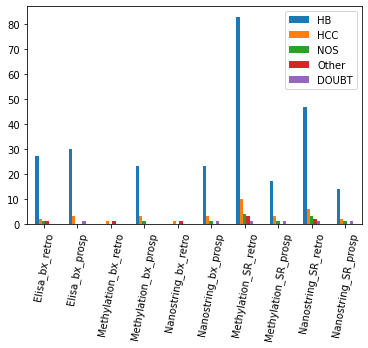

In [35]:
df_counts = pd.DataFrame()
def counts_nano (diagnostico, cohorte, rangoI, rangoF):
    df_counts = df_global.loc[(df_global['International'] == diagnostico)]
    df_counts = df_counts.loc[(df_global['Retrospective1/Prospective2'] == cohorte)]
    df_counts = df_counts.loc[:, rangoI : rangoF]
    df_counts = df_counts.dropna()
    return (df_counts.shape[0])

def counts_met(diagnostico, cohorte, variable):
    df_counts = df_global.loc[(df_global['International'] == diagnostico)]
    df_counts = df_counts.loc[(df_global['Retrospective1/Prospective2'] == cohorte)]
    df_counts = df_counts.loc[:, variable]
    df_counts = df_counts.dropna()
    return (df_counts.shape[0])
def counts_elisa(diagnostico, cohorte):
    df_counts = df_global.loc[(df_global['International'] == diagnostico)]
    df_counts = df_counts.loc[(df_global['Retrospective1/Prospective2'] == cohorte)]
    df_counts = df_counts.loc[:, "C1QBP_ELISA_bx" : "SPINK1_ELISA_bx"]
    df_counts = df_counts.drop(["C1QBP_ELISA_EOT", "DLK1_ELISA_EOT"], axis=1)
    df_counts = df_counts.dropna()
    return (df_counts.shape[0])

for i in ["HB", "HCC", "NOS", "Other", "DOUBT"]: 

    df_counts.at[i, "Elisa_bx_retro"] = counts_elisa(i, 1)
    df_counts.at[i, "Elisa_bx_prosp"] = counts_elisa(i, 2)
    df_counts.at[i, "Methylation_bx_retro"] = counts_met(i, 1, "qualu _bx")
    df_counts.at[i, "Methylation_bx_prosp"] = counts_met(i, 2, "qualu _bx")
    df_counts.at[i, "Nanostring_bx_retro"] = counts_nano(i, 1, "ACAN_bx", "TBP_bx")
    df_counts.at[i, "Nanostring_bx_prosp"] = counts_nano(i, 2, "ACAN_bx", "TBP_bx")

    df_counts.at[i, "Methylation_SR_retro"] = counts_met(i, 1, "qualu_SR")
    df_counts.at[i, "Methylation_SR_prosp"] = counts_met(i, 2, "qualu_SR")
    df_counts.at[i, "Nanostring_SR_retro"] = counts_nano(i, 1, "ACAN_SR", "TBP_SR")
    df_counts.at[i, "Nanostring_SR_prosp"] = counts_nano(i, 2, "ACAN_SR", "TBP_SR")





df_counts.T.plot.bar()
plt.xticks(rotation=80)


In [ ]:
df_counts = pd.DataFrame()
def counts_rango (diagnostico, cohorte, rangoI, rangoF, col):
    df_counts = df_global.loc[(df_global['International'] == diagnostico)]
    df_counts = df_counts.loc[(df_global['Retrospective1/Prospective2'] == cohorte)]
    df_counts = df_counts.loc[:, rangoI : rangoF]
    df_counts = df_counts.dropna()
    df_counts.at[diagnostico, col] = df_counts.shape[0]
    

def counts(diagnostico, cohorte, variable, col):
    df_counts = df_global.loc[(df_global['International'] == diagnostico)]
    df_counts = df_counts.loc[(df_global['Retrospective1/Prospective2'] == cohorte)]
    df_counts = df_counts.loc[:, variable]
    df_counts = df_counts.dropna()
    df_counts.at[diagnostico, col] = df_counts.shape[0]
counts("HB", 2, "qualu _bx", "Hola")
counts_rango("HB",2,  "ACAN_SR", "TBP_SR", "GDC" )

In [ ]:
df_counts.at["HB", "LOcal"] = 3
df_counts


In [ ]:
dfPrueba = pd.DataFrame()
Dict = { 'Nano bx': {'Retrospective': 180, "Nano prosp":50},
         'Nano SR': {'Nano retro': 110, 'Nano prosp': 20}}
dfPrueba = pd.DataFrame(data=Dict)
dfPrueba.T.plot(kind="bar")

In [ ]:
dfElisa = pd.DataFrame()
l = []
a =  df_elisa_retro["index"].value_counts().sum()
l.append(a)
dfElisa= dfElisa.assign(ElisaR= l)
dfCounts

l = []
a =  df_elisa_prosp["index"].value_counts().sum()
l.append(a)
dfElisa = dfElisa.assign( ElisaP= l)

dfMet = pd.DataFrame()
l = []
a =  df_met_retro["index"].value_counts().sum()
l.append(a)
dfMet= dfMet.assign(MetR= l)


l = []
a =  df_met_prosp["index"].value_counts().sum()
l.append(a)
dfMet = dfMet.assign( MetP= l)

l = []
a =  df_metR_retro["index"].value_counts().sum()
l.append(a)
dfMet = dfMet.assign( MetR_R= l)

l = []
a =  df_metR_prosp["index"].value_counts().sum()
l.append(a)
dfMet = dfMet.assign( MetP_R= l)

dfMet.plot(kind="bar")
dfElisa.plot(kind="bar")